In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from scholarly import scholarly
from googlesearch import search
import requests
import re
import time
import random

In [2]:
fer_datasets = ["CK+", "MMI", "JAFFE", "TFD", "FER-2013", "AFEW7.0", 
    "SFEW2.0", "Multi-PIE", "BU-3DFE", "Oulu-CASIA", 
    "RaFD", "KDEF", "EmotioNet", "RAF-DB", "AffectNet", "ExpW"]


In [3]:
fer_datasets_LONG = [
    "Extended Cohn-Kanade", 
    'MMI Facial Expression',
    "Japanese Female Facial Expression", 
    "Toronto Face Database",
    "Binghamton University 3D Facial Expression",
    "Oulu-CASIA",
    "Radboud Faces Database",
    "Karolinska Directed Emotional Faces",
    "Acted Facial Expressions In The Wild",
    "Static Facial Expression in the Wild",
    "CMU Multi-PIE",
    "Affective Faces Database",
    "Expression in-the-Wild"
]


In [4]:
topics = ["facial expression recognition", "FER", "deep learning", "machine learning", "classification", "classifier", "neural network", "CNN"]

In [6]:
file_path = 'scholarly_papers_combined_extended.csv'  
FER_df = pd.read_csv(file_path)
print(FER_df.shape)
FER_df.head()

(1482, 36)


,Title,Authors,Year,Cited By,Dataset,Abstract,DOI,Journal,URL,Mentions_Accuracy,...,Mentions_Statistical_significance,Mentions_P-value,Mentions_T-test,Mentions_Anova,Mentions_Correlation,Mentions_Regression,Mentions_Baseline_comparison,Mentions_Mae,Mentions_Rmse,Mentions_Bias
0,Facial expression recognition,"['Y Tian', 'T Kanade', 'JF Cohn']",2011,255,Extended Cohn-Kanade facial expression recogni...,This chapter introduces recent advances in fac...,No DOI,Handbook of face recognition,https://paperswithcode.com/task/facial-express...,False,...,False,False,False,False,False,False,False,False,False,False
1,Facial emotion recognition using convolutional...,['N Mehendale'],2020,328,Extended Cohn-Kanade FER,FERC was extensively tested with more than 750...,No DOI,SN Applied Sciences,https://link.springer.com/article/10.1007/s424...,False,...,False,False,False,False,False,False,False,False,False,False
2,Facial emotion recognition using convolutional...,['N Mehendale'],2020,328,Extended Cohn-Kanade FER,FERC was extensively tested with more than 750...,No DOI,SN Applied Sciences,https://link.springer.com/article/10.1007/s424...,False,...,False,False,False,False,False,False,False,False,False,False
3,Deep-emotion: Facial expression recognition us...,"['S Minaee', 'M Minaei', 'A Abdolrashidi']",2021,664,Extended Cohn-Kanade FER,"FER dataset, and the images in the second and ...",No DOI,Sensors,https://www.mdpi.com/1424-8220/21/9/3046,False,...,False,False,False,False,False,False,False,False,False,False
4,The extended cohn-kanade dataset (ck+): A comp...,"['P Lucey', 'JF Cohn', 'T Kanade', 'J Saragih']",2010,5135,Extended Cohn-Kanade deep learning,"It involves computer vision, machine learning ...",No DOI,2010 ieee computer …,https://ieeexplore.ieee.org/document/5543262,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
# Check for duplicate rows based on all columns
duplicate_rows = FER_df[FER_df.duplicated()]

# Display the duplicate rows
print(duplicate_rows)

                                                  Title  \
2     Facial emotion recognition using convolutional...   
5     The extended cohn-kanade dataset (ck+): A comp...   
7     The extended cohn-kanade dataset (ck+): A comp...   
8     Extended deep neural network for facial emotio...   
10    The extended cohn-kanade dataset (ck+): A comp...   
...                                                 ...   
1472  Facial expression recognition using deep convo...   
1473  Torontocity: Seeing the world with a million eyes   
1476  Do deep neural networks learn facial action un...   
1478  Do deep neural networks learn facial action un...   
1479  Facenet2expnet: Regularizing a deep face recog...   

                                                Authors  Year  Cited By  \
2                                       ['N Mehendale']  2020       328   
5       ['P Lucey', 'JF Cohn', 'T Kanade', 'J Saragih']  2010      5135   
7       ['P Lucey', 'JF Cohn', 'T Kanade', 'J Saragih']  2010     

In [50]:
df = FER_df.copy()

# Dropping duplicate rows
#df_clean = df.drop_duplicates()
# Remove duplicate rows based on the 'Title' column, keeping the first occurrence
df_clean = df_clean.drop_duplicates(subset='Title', keep='first')

print(df_clean.shape, FER_df.shape)

# Checking for missing values
missing_values = df_clean.isnull().sum()
print(missing_values)

(111, 36) (1482, 36)
Title                                0
Authors                              0
Year                                 0
Cited By                             0
Dataset                              0
Abstract                             0
DOI                                  0
Journal                              1
URL                                  0
Mentions_Accuracy                    0
Mentions_F1                          0
Mentions_Precision                   0
Mentions_Recall                      0
Mentions_Auc                         0
Mentions_Roc                         0
Mentions_Sensitivity                 0
Mentions_Specificity                 0
Mentions_Confusion_matrix            0
Mentions_Loss_function               0
Mentions_Cross-entropy               0
Mentions_Mean_squared_error          0
Mentions_Overfitting                 0
Mentions_Underfitting                0
Mentions_Cross-validation            0
Mentions_Training_time               0
Ment

In [51]:
# Descriptive statistics for numerical columns
summary_stats = df_clean[['Year', 'Cited By']].describe()

# Count how often statistical terms are mentioned
statistical_terms_counts = df_clean[['Mentions_Accuracy', 'Mentions_Statistical_significance', 'Mentions_P-value', 'Mentions_T-test',
                                     'Mentions_Anova', 'Mentions_Correlation', 'Mentions_Regression', 'Mentions_Baseline_comparison',
                                     'Mentions_Mae', 'Mentions_Rmse', 'Mentions_Bias']].sum()

print(summary_stats)
print(statistical_terms_counts)

              Year     Cited By
count   111.000000   111.000000
mean   2012.945946   423.063063
std       6.431228   694.148350
min    1989.000000   101.000000
25%    2010.000000   140.000000
50%    2015.000000   225.000000
75%    2017.000000   403.000000
max    2022.000000  5135.000000
Mentions_Accuracy                    4
Mentions_Statistical_significance    0
Mentions_P-value                     0
Mentions_T-test                      0
Mentions_Anova                       0
Mentions_Correlation                 0
Mentions_Regression                  1
Mentions_Baseline_comparison         0
Mentions_Mae                         0
Mentions_Rmse                        0
Mentions_Bias                        0
dtype: int64


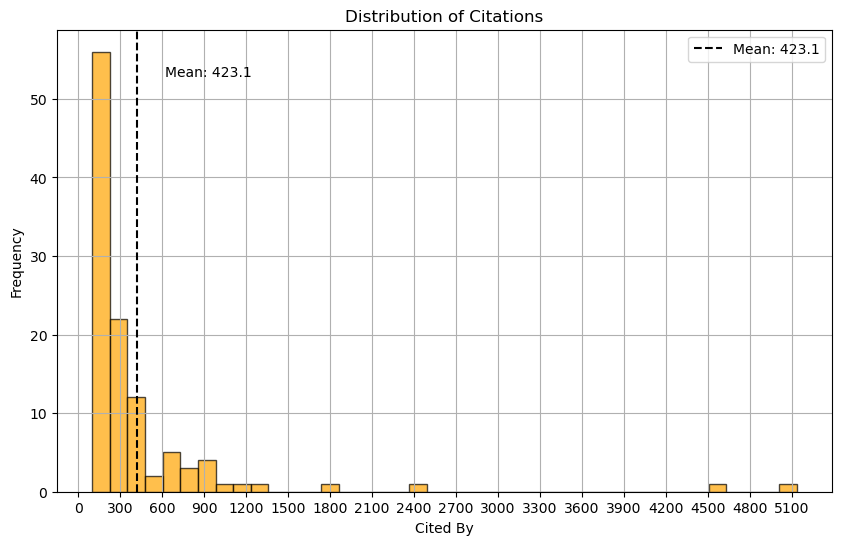

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the mean and median
mean_citations = df_clean['Cited By'].mean()
median_citations = df_clean['Cited By'].median()

# Create the histogram with bar border color and increased x-tick labels
plt.figure(figsize=(10, 6))

# Histogram with border color (edgecolor) and larger number of bins
plt.hist(df_clean['Cited By'], bins=40, color='orange', edgecolor='black', alpha=0.7)

# Adding vertical lines for mean and median
plt.axvline(mean_citations, color='black', linestyle='dashed', linewidth=1.5, label=f'Mean: {mean_citations:.1f}')

# Adding title and labels
plt.title('Distribution of Citations')
plt.xlabel('Cited By')
plt.ylabel('Frequency')

# Increasing the number of x-tick labels
max_cited_by = df_clean['Cited By'].max()  # Find the maximum value in 'Cited By'
plt.xticks(np.arange(0, max_cited_by + 100, step=300))  # Set ticks with a step of 500

# Adding annotations for mean and median
plt.text(mean_citations + 200, plt.ylim()[1] * 0.9, f'Mean: {mean_citations:.1f}', color='black', fontsize=10)

# Adding a legend
plt.legend()

# Display grid
plt.grid(True)

# Show the plot
plt.show()


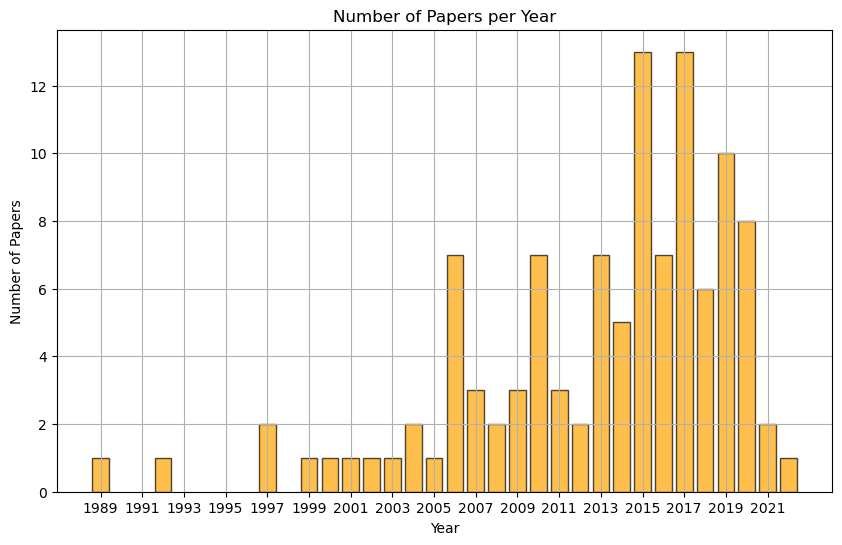

In [53]:
# Plot 1: Number of Papers per Year

# Count the number of papers for each year
papers_per_year = df_clean['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))

# Create a bar plot for the number of papers per year
plt.bar(papers_per_year.index, papers_per_year.values, color='orange', edgecolor='black', alpha=0.7)

# Adding title and labels
plt.title('Number of Papers per Year')
plt.xlabel('Year')
plt.ylabel('Number of Papers')

# Display grid
plt.grid(True)

# Adding x-tick labels with a step of 1 (for every year)
plt.xticks(np.arange(papers_per_year.index.min(), papers_per_year.index.max() + 1, step=2))

# Show the plot
plt.show()


In [55]:
# Sort the DataFrame by the 'Year' column in ascending order
earliest_papers = df_clean.sort_values(by='Year', ascending=True).head(10)

# Display the 10 earliest papers
print(earliest_papers['URL'])

560     https://link.springer.com/article/10.1007/BF00...
605     https://journals.sagepub.com/doi/10.1177/00220...
545     https://link.springer.com/article/10.1023/A:10...
1263          https://ieeexplore.ieee.org/document/554195
463             https://pubmed.ncbi.nlm.nih.gov/10633314/
1109          https://ieeexplore.ieee.org/document/840614
51            https://ieeexplore.ieee.org/document/908962
1226         https://ieeexplore.ieee.org/document/1000134
1088         https://ieeexplore.ieee.org/document/1176132
1178    https://link.springer.com/chapter/10.1007/978-...
Name: URL, dtype: object


In [61]:
# Remove rows where 'Year' is less than 1997
df_clean = df_clean[df_clean['Year'] >= 1997]

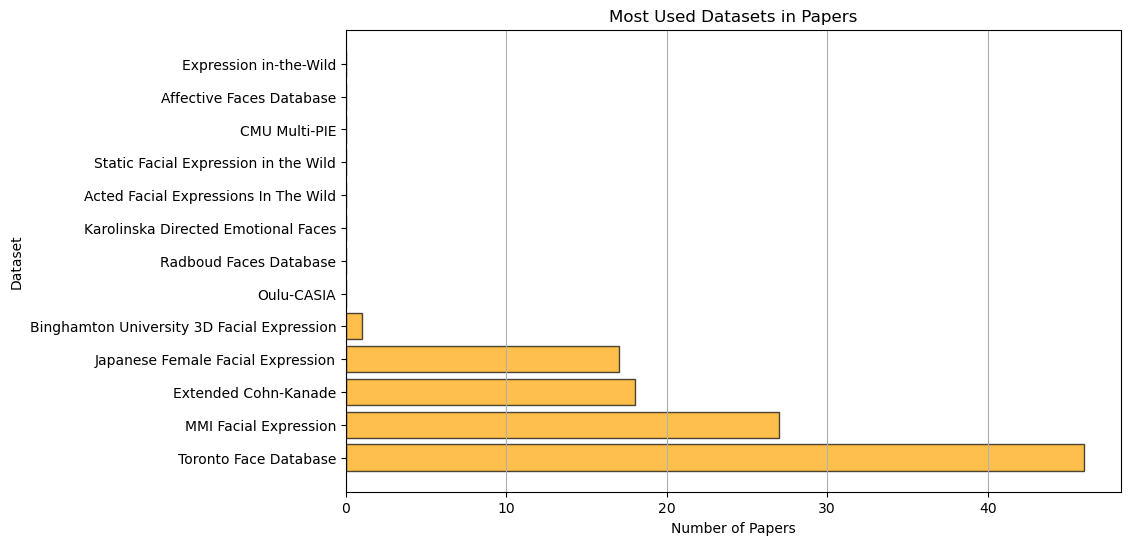

In [64]:
# Initialize an empty dictionary to store dataset counts
dataset_counts = {}

# Count occurrences of each dataset using regex
for dataset in fer_datasets_LONG:
    count = df_clean['Dataset'].apply(lambda x: bool(re.search(dataset, str(x), re.IGNORECASE))).sum()
    dataset_counts[dataset] = count

# Convert the dataset counts into a DataFrame
dataset_counts_df = pd.DataFrame(list(dataset_counts.items()), columns=['Dataset', 'Count'])

# Sort dataset counts for better visualization
dataset_counts_df_sorted = dataset_counts_df.sort_values(by='Count', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot for the most used datasets
plt.barh(dataset_counts_df_sorted['Dataset'], dataset_counts_df_sorted['Count'], color='orange', edgecolor='black', alpha=0.7)

# Adding title and labels
plt.title('Most Used Datasets in Papers')
plt.xlabel('Number of Papers')
plt.ylabel('Dataset')

# Display grid
plt.grid(True, axis='x')

# Show the plot
plt.show()

In [68]:
df_clean.to_csv('FirstScrapes.csv')

In [69]:
# Count the number of rows that have a valid DOI (not missing or 'No DOI')
doi_count = df_clean[df_clean['DOI'].notna() & (df_clean['DOI'] != 'No DOI')].shape[0]

# Display the count
print(f"Number of valid DOI numbers: {doi_count}")


Number of valid DOI numbers: 0
